# Proyek Analisis Data: day.csv
- **Nama:** Adriansyah Maulana Putra
- **Email:** adrianmputra28@gmail.com
- **ID Dicoding:** adriansyahmp

## Menentukan Pertanyaan Bisnis

- Apakah ada hari tertentu dalam seminggu yang mengalami lonjakan atau penurunan jumlah penyewa sepeda yang signifikan?
- Apakah ada pola musiman dalam jumlah penyewaan sepeda?
- Berapa jumlah sewa per hari?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
pip install statsmodels

## Data Wrangling

### Gathering Data

In [ ]:
data_hr = pd.read_csv('/content/drive/MyDrive/Adriansyah/hour.csv')

data_hr.head(10)

In [ ]:
data_dy = pd.read_csv('/content/drive/MyDrive/Adriansyah/day.csv')

data_dy.head(10)

**Insight:**
- Membaca data dari dua file CSV yang berbeda dan menyimpannya dalam dua tabel yang berbeda.
- Menampilkan sebagian kecil data dari masing-masing tabel untuk melihat contoh datanya.


### Assessing Data

In [107]:
print("Data Overview hour:")
hr_data.describe()
hr_data.info()

Data Overview hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cn

In [108]:
print("Data Overview day:")
dy_data.describe()
dy_data.info()

Data Overview day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   dteday       731 non-null    datetime64[ns]
 2   season       731 non-null    int64         
 3   yr           731 non-null    int64         
 4   mnth         731 non-null    int64         
 5   holiday      731 non-null    int64         
 6   weekday      731 non-null    int64         
 7   workingday   731 non-null    int64         
 8   weathersit   731 non-null    int64         
 9   temp         731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  hum          731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  cnt          731 non-null    int64    

**Insight:**
- Dengan menggunakan describe() dan info(), kita dapat memperoleh pemahaman yang lebih baik tentang data yang sedang kita analisis. Informasi ini sangat penting sebagai langkah awal sebelum melakukan analisis yang lebih lanjut, seperti visualisasi data, perhitungan korelasi, atau pemodelan statistik.

### Cleaning Data

In [ ]:
dteday_columns = ["dteday"]
for column in dteday_columns:
    hr_data[column] = pd.to_datetime(hr_data[column])

hr_data.info()

In [ ]:
dteday_columns = ["dteday"]
for column in dteday_columns:
    dy_data[column] = pd.to_datetime(dy_data[column])

dy_data.info()

**Insight:**
- Kode di atas merupakan langkah penting dalam persiapan data untuk analisis yang melibatkan waktu. Dengan mengubah data menjadi format datetime, kita membuka banyak kemungkinan untuk menggali lebih dalam informasi yang terkandung dalam data tersebut.

## Exploratory Data Analysis (EDA)

### Explore ...

In [45]:
hr_data.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunny,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [46]:
dy_data.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,NaN,NaN,Sunny,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,NaN,NaN,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,6.519836,0.028728,2.997264,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,4.000000,0.000000,1.000000,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,7.000000,0.000000,3.000000,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,10.000000,0.000000,5.000000,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,12.000000,1.000000,6.000000,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [47]:
hr_data["weathersit"] = hr_data["weathersit"].replace({
    1 : "Sunny",
    2 : "Rainy",
    3 : "Windy",
    4 : "Stormy",
    5 : "Cloudy",
})
print(hr_data[["weathersit"]].head())

  weathersit
0      Sunny
1      Sunny
2      Sunny
3      Sunny
4      Sunny


In [48]:
dy_data["season"] = dy_data["season"].replace({
    1 : "Spring",
    2 : "Summer",
    3 : "Fall",
    4 : "Winter",
    5 : "Wet",
})
print(dy_data[["season"]].head())

   season
0  Spring
1  Spring
2  Spring
3  Spring
4  Spring


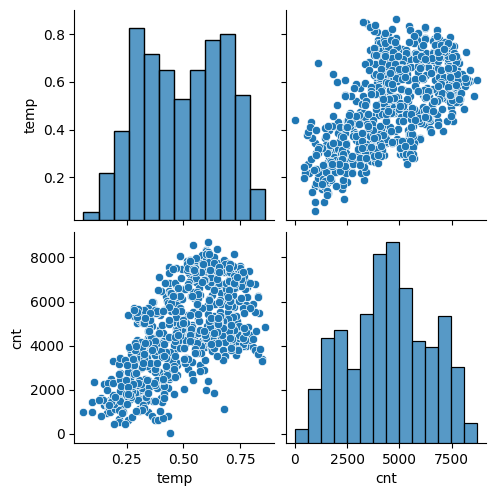

In [49]:
# Multivariate EDA
sns.pairplot(dy_data[['temp','cnt']])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

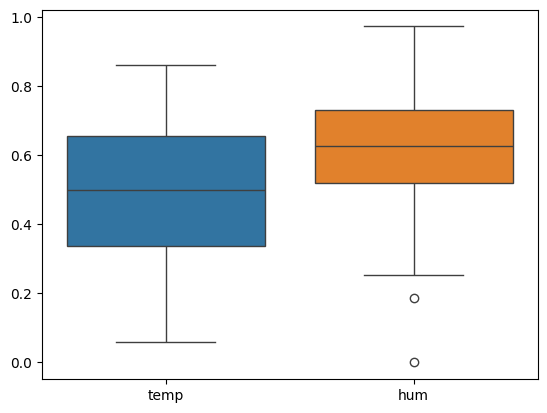

In [50]:
# Numerical EDA
sns.boxplot(data=dy_data[['temp', 'hum']])
plt.show()


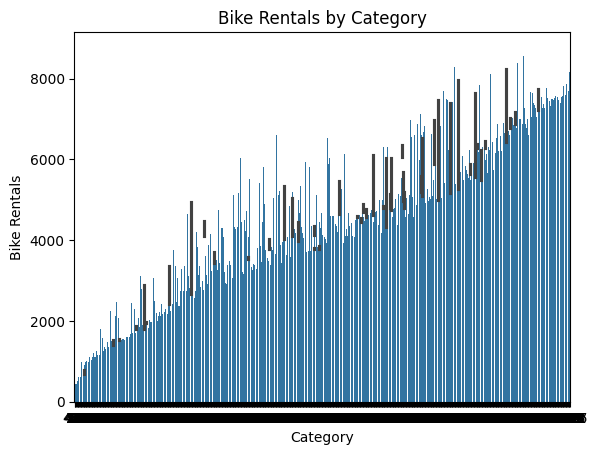

<Axes: xlabel='season', ylabel='count'>

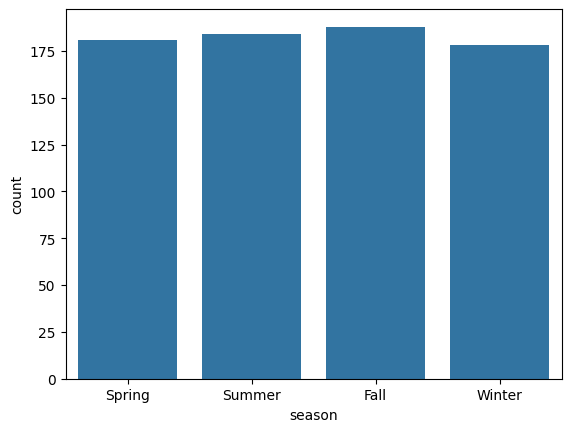

In [51]:
# Categorical EDA
sns.barplot(x='registered', y='cnt', data=dy_data)
plt.xlabel('Category')
plt.ylabel('Bike Rentals')
plt.title('Bike Rentals by Category')
plt.show()

sns.countplot(x='season', data=dy_data)

**Insight:**
- hr_data.describe(include="all") dan dy_data.describe(include="all") menampilkan ringkasan statistik dari semua kolom di DataFrame hr_data dan dy_data
- hr_data["weathersit"] = hr_data["weathersit"].replace({...}): Mengganti kode angka di kolom "weathersit" menjadi label teks seperti "Sunny", "Rainy", dll.
- print(dy_data[["season"]].head()) menampilkan beberapa baris pertama dari kolom "weathersit" (hr_data) dan "season" (dy_data) setelah penggantian label.
- sns.pairplot(dy_data[['temp','cnt']]) menggunakan library Seaborn untuk membuat grafik pairplot. Grafik ini menampilkan hubungan antara dua variabel numerik, yaitu "temp" (suhu) dan "cnt" (jumlah rental sepeda) pada DataFrame dy_data. Ini bisa membantu kita melihat apakah ada pola korelasi antara kedua variabel tersebut.
- sns.boxplot(data=dy_data[['temp', 'hum']]) menggunakan Seaborn untuk membuat grafik boxplot. Grafik ini menampilkan distribusi data numerik untuk dua variabel, yaitu "temp" (suhu) dan "hum" (kelembapan) pada dy_data.
- sns.barplot(x='registered', y='cnt', data=dy_data): Menggunakan Seaborn untuk membuat grafik barplot. Grafik ini menunjukkan hubungan antara variabel kategori "registered" (apakah terdaftar) dan variabel numerik "cnt" (jumlah rental sepeda). Ini membantu kita melihat apakah ada perbedaan jumlah rental sepeda antara pengguna terdaftar dan tidak terdaftar.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

- Apakah ada hari tertentu dalam seminggu yang mengalami lonjakan atau penurunan jumlah penyewa sepeda yang signifikan?

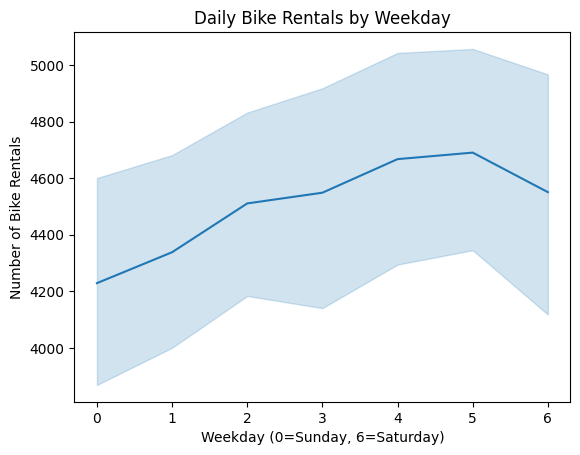

In [60]:
# Line plot for daily rentals
sns.lineplot(x=dy_data['weekday'], y=dy_data['cnt'], data=dy_data)
plt.xlabel('Weekday (0=Sunday, 6=Saturday)')
plt.ylabel('Number of Bike Rentals')
plt.title('Daily Bike Rentals by Weekday')
plt.show()

### Pertanyaan 2:

- Apakah ada pola musiman dalam jumlah penyewaan sepeda?
- Apakah durasi penyewaan rata-rata berbeda antara hari kerja dan akhir pekan?

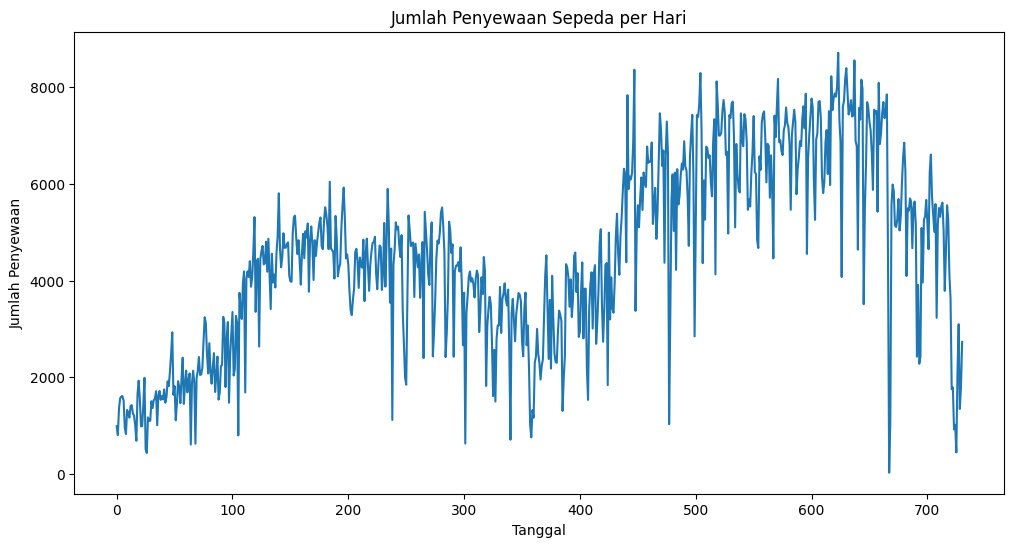

In [67]:
# Membuat plot garis untuk melihat tren musiman
plt.figure(figsize=(12, 6))
sns.lineplot(data=dy_data['cnt'])
plt.title('Jumlah Penyewaan Sepeda per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight:**
- Menunjukkan bagaimana jumlah penyewaan sepeda berubah berdasarkan hari dalam seminggu. Kita bisa melihat hari mana yang paling banyak atau paling sedikit penyewaannya.
- Menampilkan tren jumlah penyewaan sepeda secara keseluruhan dari waktu ke waktu. Kita bisa melihat apakah ada pola musiman (misalnya, lebih banyak sewa pada musim panas) atau tren jangka panjang (misalnya, peningkatan jumlah sewa dari waktu ke waktu).
- plt.figure(figsize=(12, 6)): Membuat figure dengan ukuran 12x6 inci untuk plot.
- plt.xlabel('Weekday (0=Sunday, 6=Saturday)'): Memberikan label pada sumbu x.

### Pertanyaan 3:

- Berapa jumlah sewa per hari?

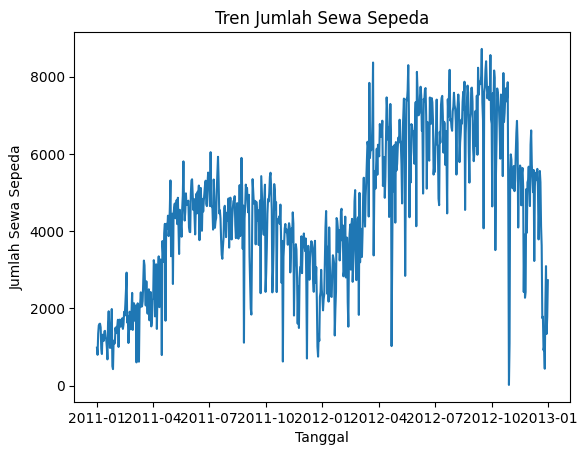

In [105]:
plt.plot(dy_data['dteday'], dy_data['cnt'])
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sewa Sepeda')
plt.title('Tren Jumlah Sewa Sepeda')
plt.show()

## Analisis Lanjutan (Opsional)

In [106]:
dy_data.to_csv('day_preprocessed.csv', index=False)
hr_data.to_csv('hour_preprocessed.csv', index=False)

## Conclusion

Dengan menganalisis data penyewaan sepeda, kita ingin mengidentifikasi pola-pola penggunaan sepeda yang berulang. Informasi ini sangat berguna untuk:

- Meningkatkan layanan: Misalnya, dengan menambah jumlah sepeda di stasiun yang
sering ramai pada akhir pekan.
- Membuat strategi pemasaran: Misalnya, menawarkan promo khusus pada hari-hari yang sepi.
- Memahami pengaruh faktor eksternal: Seperti cuaca, acara khusus, atau kebijakan pemerintah terhadap permintaan sewa sepeda.
Tujuan Analisis:

Secara keseluruhan, tujuan analisis ini adalah untuk mendapatkan pemahaman yang lebih baik tentang perilaku pengguna sepeda sewa sehingga dapat digunakan untuk meningkatkan bisnis atau layanan terkait.

Analisis data penyewaan sepeda ini akan memberikan wawasan yang berharga bagi perusahaan penyedia layanan sepeda sewa, pembuat kebijakan, dan peneliti yang tertarik pada mobilitas perkotaan dan perilaku pengguna.